### About The Dataset

#### The data was acquired from Kaggle public dataset for Heart Disease Dataset https://www.kaggle.com/datasets/dharanireddy/heart-disease

#### Context:
##### This data set relates to heart disease patients.

#### Contents:
##### * age
##### * sex
##### * chest pain type (4 values)
##### * resting blood pressure
##### * serum cholestoral in mg/dl
##### * fasting blood sugar > 120 mg/dl
##### * resting electrocardiographic results (values 0,1,2)
##### * maximum heart rate achieved
##### * exercise induced angina
##### * oldpeak = ST depression induced by exercise relative to rest
##### * the slope of the peak exercise ST segment
##### * thalach: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

#### Problem Statement:
#####       Exploratory Analysis of Heart Disease Dataset

#### Importing Libraies and Dataset

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("heart_disease_data.csv")

#### Getting Information from the Dataset

In [3]:
# Display Top Rows of dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Display last rows of dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Shape of Dataset
data.shape

(303, 14)

In [6]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 303
Number of Columns: 14


In [7]:
# information of dataset(Total number of rows, columns and data type of each column)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Cleaning The Data for duplicates

In [9]:
#Check for duplicate and drop duplicate
data_dup=data.duplicated().any()
print(data_dup)

True


In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(302, 14)

#### Getting Overall Statistics of Dataset

In [12]:
#Get overall Statistics about the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Analysing the Dataset

In [13]:
# Draw Correlation Matrix
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

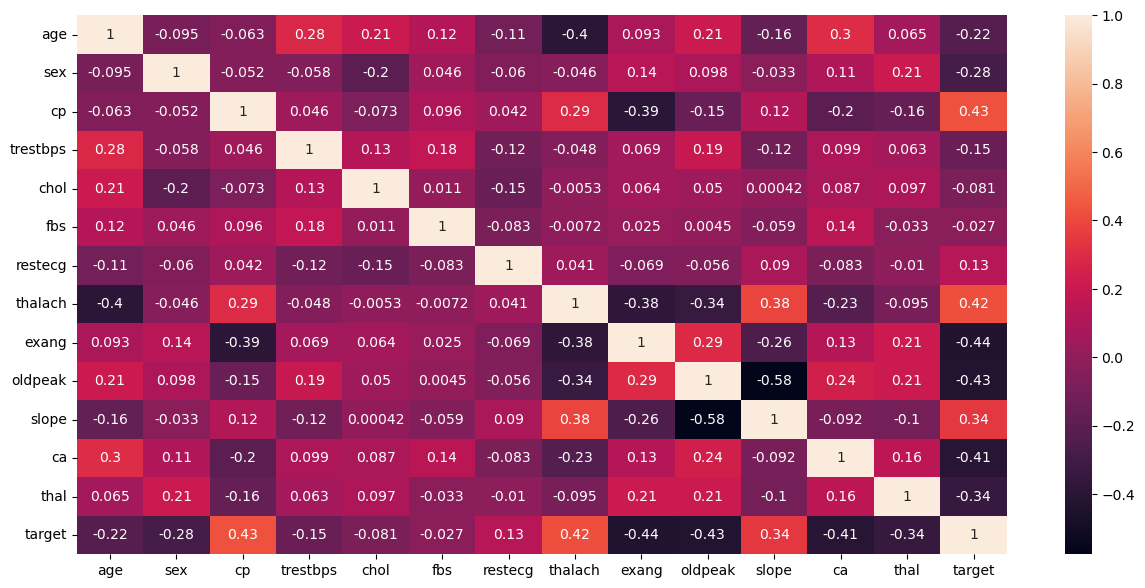

In [14]:
# Pass correlation to heat map
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

In [15]:
# Check the number of diseased patients
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

#### Visualising the Data

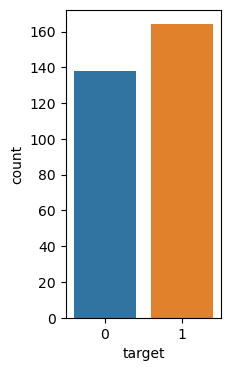

In [17]:
#Visualize the above target data
plt.figure(figsize=(2,4))
sns.countplot(x='target',data=data)
plt.show()

In [18]:
# Find count of male and female with heart disease
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

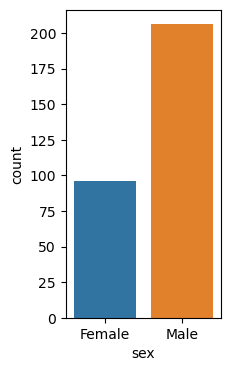

In [20]:
#visualize the above count data
plt.figure(figsize=(2,4))
sns.countplot(x='sex',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

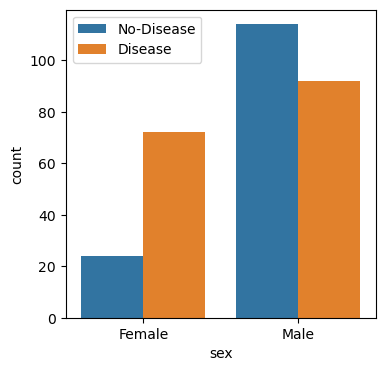

In [21]:
#check gender distribution with disease and no-disease 
plt.figure(figsize=(4,4))
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

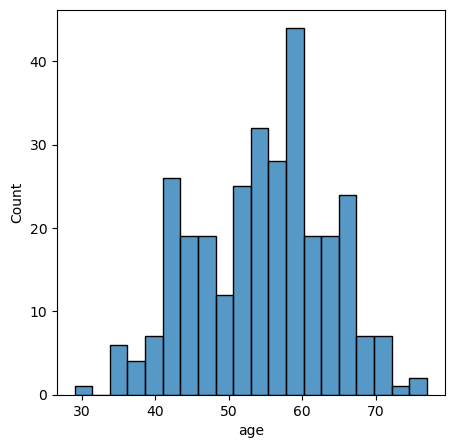

In [22]:
# Check age distribution
plt.figure(figsize=(5,5))
sns.histplot(x=data['age'],bins=20)
plt.show()

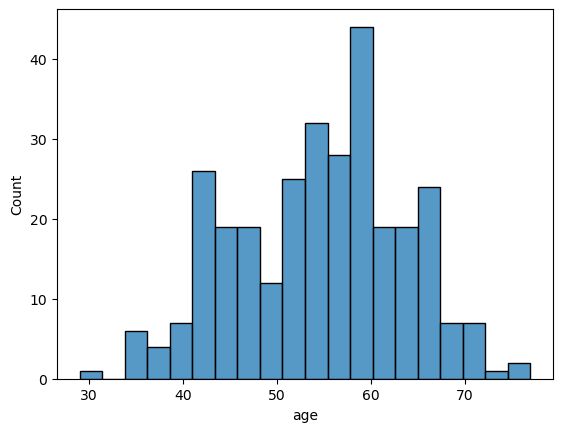

<Figure size 640x480 with 0 Axes>

In [23]:
sns.histplot(x=data['age'],bins=20)
plt.show()
fig = plt.figure()
fig.tight_layout()


#### Chest-pain Type(4 Values)
#####    1. Value 0: Typical Angina
#####    2. Value 1: Atypical Angina
#####    3. Value 2: Non-Anginal Pain
#####    4. Value 3: Asymptomatic Pain

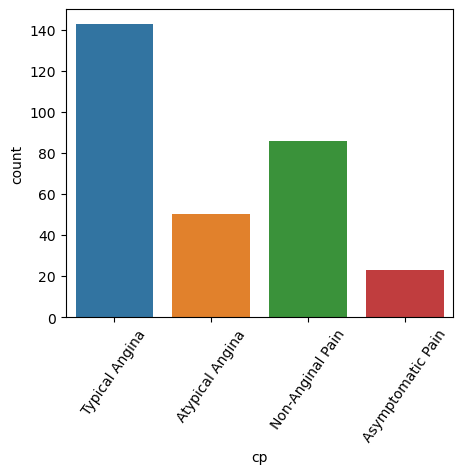

In [24]:
# Check Chest Pain Type
plt.figure(figsize=(5,4))
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic Pain'])
plt.xticks(rotation=55)
plt.show()

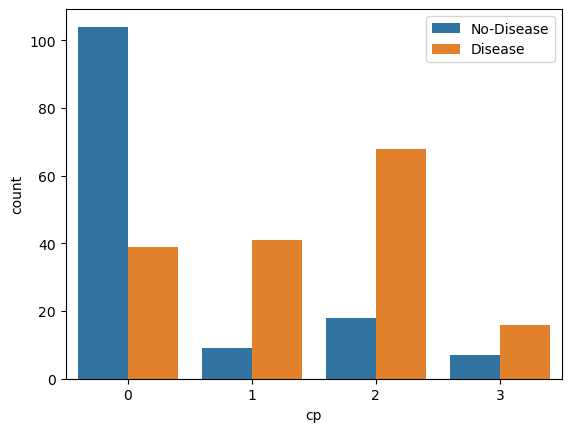

In [25]:
# Show chest Pain distribution as per target variable
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

#### Visualising other data contributing to heart disease

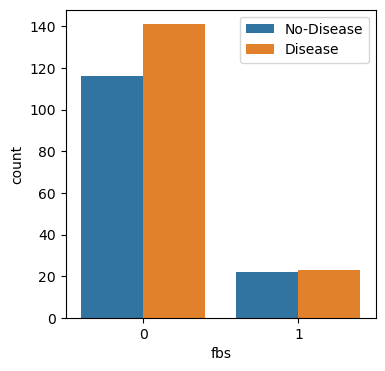

In [26]:
# Show Fasting Blood Sugar Distribution According to Target Variable
plt.figure(figsize=(4,4))
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

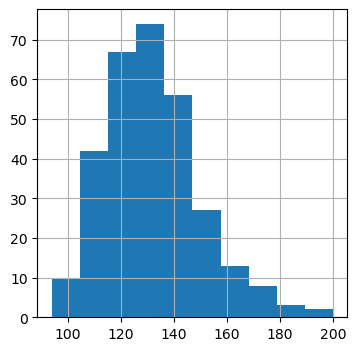

In [27]:
#Check Resting Blood Pressure Distribution
plt.figure(figsize=(4,4))
data['trestbps'].hist()
plt.show()

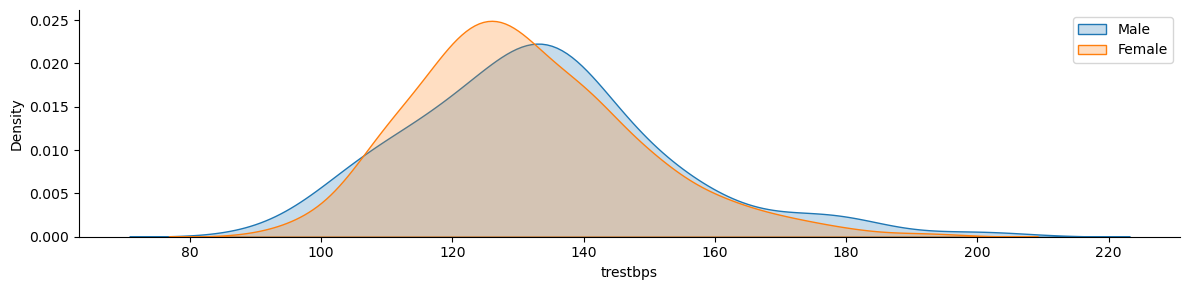

<Figure size 640x480 with 0 Axes>

In [28]:
# Compare Resting Blood Pressure As Per Sex Column
g=sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
fig=plt.figure()
fig.tight_layout()
figsize=(4,5)      
plt.show()

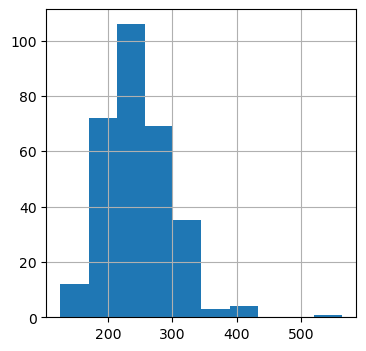

In [29]:
#Distribution Of Serum Cholestrol
plt.figure(figsize=(4,4))
data['chol'].hist()
plt.show()

In [30]:
# Plot Continous Variables
# separate columns with continuous values and categorical values
cat_val=[]
con_val=[]

for column in data.columns:
        if data[column].nunique() <= 10:
            cat_val.append(column)
        else:
            con_val.append(column)
            

In [31]:
# Categorical Value
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [32]:
#Continuous Value
con_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

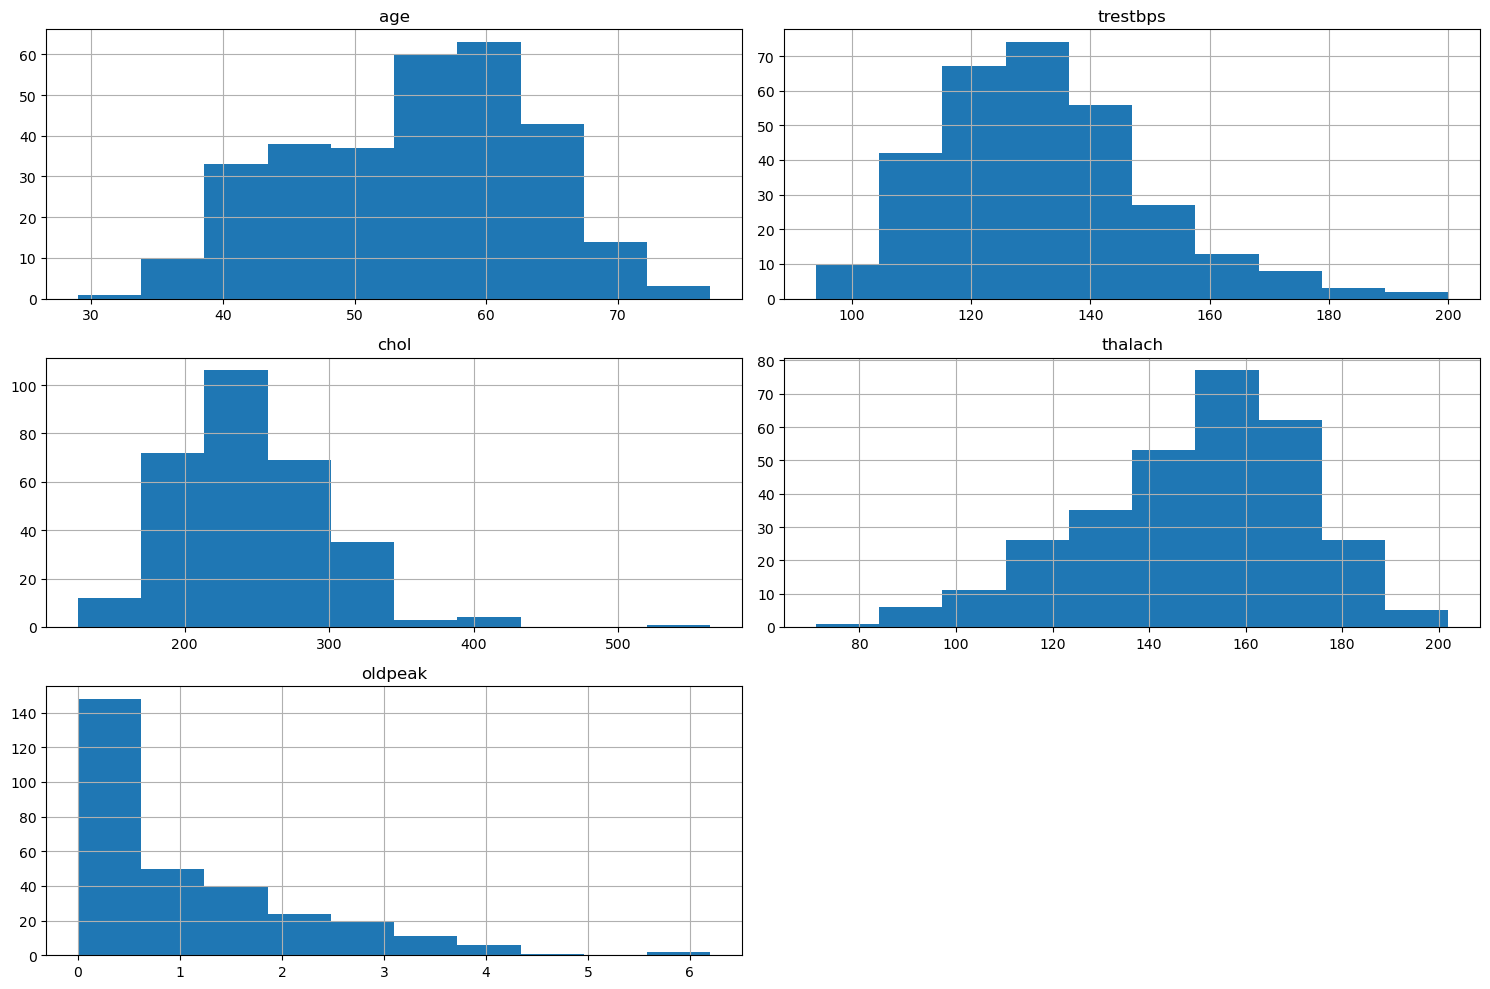

In [33]:
# Histogram for continuous values
data.hist(con_val, figsize=(15,10))
plt.tight_layout()
plt.show()